# Data Ingestion & Inspection

In [1]:
import pandas as pd
df = pd.read_csv('worldbank.csv')

## Review of pandas dataframe

### Inspecting your data
You can use the DataFrame methods .head() and .tail() to view the first few and last few rows of a DataFrame. In this exercise, we have imported pandas as pd and loaded population data from 1960 to 2014 as a DataFrame df. This dataset was obtained from the World Bank.

Your job is to use df.head() and df.tail() to verify that the first and last rows match a file on disk.

In [2]:
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [3]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


### DataFrame data types
Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and NaN ('Not-a-Number') types which often indicate missing data. In this exercise, we have imported pandas as pd and read in the world population data which contains some NaN values, a value often used as a place-holder for missing or otherwise invalid data entries. Your job is to use df.info() to determine information about the total count of non-null entries and infer the total count of 'null' entries, which likely indicates missing data. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


### NumPy and pandas working together

Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute .values to represent a DataFrame df as a NumPy array. You can also pass pandas data structures to NumPy methods. In this exercise, we have imported pandas as pd and loaded world population data every 10 years since 1960 into the DataFrame df. This dataset was derived from the one used in the previous exercise.

Your job is to extract the values and store them in an array using the attribute .values. You'll then use those values as input into the NumPy np.log10() method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy np.log10() method and compare the results.



In [5]:
df1 = pd.DataFrame([3034970564.0, 3684822701.0, 4436590356.0, 5282715991.0, 6115974486.0,6924282937.0], 
                   columns = ['Total Population'], 
                  index = [1960, 1970, 1980, 1990, 2000, 2010])
df1.index.name = 'Year'
df1 

,Total Population
Year,
1960,3.034971e+09
1970,3.684823e+09
1980,4.436590e+09
1990,5.282716e+09
2000,6.115974e+09
2010,6.924283e+09


In [6]:
# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df1.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df1)

# Print original and new data containers
print(type(np_vals), type(np_vals_log10))
print(type(df1), type(df_log10))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


### others

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(13374, 5)

In [9]:
df.columns

Index(['CountryName', 'CountryCode', 'Year', 'Total Population',
       'Urban population (% of total)'],
      dtype='object')

In [10]:
type(df.columns)

pandas.indexes.base.Index

In [11]:
df.index

RangeIndex(start=0, stop=13374, step=1)

In [12]:
df1.index

Int64Index([1960, 1970, 1980, 1990, 2000, 2010], dtype='int64', name='Year')

In [13]:
type(df.index)

pandas.indexes.range.RangeIndex

In [14]:
df.head(3)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,92495902.0,31.285384
1,Caribbean small states,CSS,1960,4190810.0,31.597490
2,Central Europe and the Baltics,CEB,1960,91401583.0,44.507921


In [15]:
df.tail(2)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


In [16]:
pop = df['Total Population']
type(pop)

pandas.core.series.Series

In [17]:
pop.head()

0    9.249590e+07
1    4.190810e+06
2    9.140158e+07
3    1.042475e+09
4    8.964930e+08
Name: Total Population, dtype: float64

In [18]:
pop_array = pop.values
type(pop_array)

numpy.ndarray

## Building DataFrames from scratch
### Zip lists to build a DataFrame
In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. list_keys contains the column names 'Country' and 'Total'. list_values contains the full names of each country and the number of gold medals awarded. The values have been taken from Wikipedia.

Your job is to use those lists to construct a dictionary, and then use that dictionary to construct a DataFrame. You'll use the dict() and pd.DataFrame() methods to do so. Pandas has already been imported as pd.

Note: the zip() function combines n lists into one list of tuples, each with n elements. For example, zip([1, 2], [3, 4]) will result in [(1, 3), (2, 4)].

In [19]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values)) 

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)


[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


### Labeling your data

You can use the DataFrame attribute df.columns to view and assign new string labels to columns in a pandas DataFrame.

In this exercise, we have imported pandas as pd and defined a DataFrame df containing top Billboard hits from the 1980s (from Wikipedia). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels a, b, c, d. Your job is to use the df.columns attribute to re-assign descriptive column labels.

In [20]:
df = pd.DataFrame([['1980', 'Blondie', 'Call Me', '6'],
       ['1981', 'Chistorpher Cross', 'Arthurs Theme', '3'],
       ['1982', 'Joan Jett', 'I Love Rock and Roll', '7']])

# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

df

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


### Building DataFrames with broadcasting
You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list cities.

Your job is construct a DataFrame from the list of cities and the string 'PA'.

In [21]:
cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


               city state
0           Manheim    PA
1      Preston park    PA
2       Biglerville    PA
3           Indiana    PA
4      Curwensville    PA
5             Crown    PA
6      Harveys lake    PA
7   Mineral springs    PA
8         Cassville    PA
9        Hannastown    PA
10        Saltsburg    PA
11      Tunkhannock    PA
12       Pittsburgh    PA
13        Lemasters    PA
14       Great bend    PA


## Importing & exporting data
### Reading a flat file
In previous exercises, we have preloaded the data for you using the pandas function read_csv(). Now, it's your turn! Your job is to read the World Bank population data you saw earlier into a DataFrame using read_csv(). The file has been downloaded as world_population.csv.

The next step is to reread the same file, but simultaneously rename the columns using the names keyword input parameter, set equal to a list of new column labels. You will also need to set header=0 to rename the column labels.

Finish up by inspecting the result with df.head() and df.info() in the IPython Shell.

In [22]:
# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


### Delimiters, headers, and extensions
Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from Yahoo Finance. The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable file_messy.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and tab delimiters instead of commas.

Your job is to use pandas to read the data from this problematic file_messy using non-default input options with read_csv() so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable file_clean that has been prepared for you, as you might do in a real data workflow.

You can learn about the option input parameters needed by using help() on the pandas function pd.read_csv()

In [23]:
file_messy = 'messy_stock_data.tsv'
file_clean = 'clean_stock_data.csv'
    
# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of comments are not very useful                                                  are they?                        
Probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        

     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  5

## Plotting with pandas

### Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We have pre-loaded a pandas DataFrame df which contain the data you need. Your job is to use the DataFrame method df.plot() to visualize the data, and then explore the optional matplotlib input parameters that this .plot() method accepts.

The pandas .plot() method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

Before plotting, inspect the DataFrame in the IPython Shell using df.head(). Also, use type(df) and note that it is a single column DataFrame.

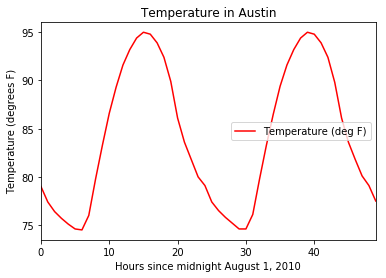

In [24]:
df = pd.DataFrame({'Temperature (deg F)':[ 79. ,  77.4,  76.4,  75.7,  75.1,  74.6,  74.5,  76. ,  79.8,
        83.3,  86.6,  89.3,  91.6,  93.2,  94.4,  95. ,  94.8,  93.9,
        92.4,  89.9,  86.1,  83.6,  81.8,  80. ,  79.1,  77.4,  76.5,
        75.8,  75.2,  74.6,  74.6,  76.1,  79.8,  83.3,  86.5,  89.4,
        91.6,  93.2,  94.4,  95. ,  94.8,  93.9,  92.4,  89.8,  86.1,
        83.6,  81.8,  80.1,  79.1,  77.5]})

import matplotlib.pyplot as plt

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()


### Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling df.plot() will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame df[column_list] to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created 4 plots. You can cycle through them by clicking on the 'Previous Plot' and 'Next Plot' buttons.

As in the previous exercise, inspect the DataFrame df in the IPython Shell using the .head() and .info() methods.

In [25]:
df['Dew Point (deg F)'] = [ 70.8,  71.2,  71.3,  71.4,  71.4,  71.3,  71.3,  72.3,  72.8,
        72.1,  71.1,  70.2,  69.1,  68.4,  67.6,  67.1,  66.8,  66.9,
        66.7,  67.7,  68.6,  69.5,  70.3,  70.7,  70.8,  71.2,  71.3,
        71.4,  71.5,  71.4,  71.3,  72.3,  72.8,  72.1,  71.1,  70.1,
        69.1,  68.3,  67.6,  67. ,  66.7,  66.8,  66.6,  67.7,  68.5,
        69.4,  70.2,  70.7,  70.8,  71.2]
df['Pressure (atm)'] = [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]
df.head()

,Temperature (deg F),Dew Point (deg F),Pressure (atm)
0,79.0,70.8,1.0
1,77.4,71.2,1.0
2,76.4,71.3,1.0
3,75.7,71.4,1.0
4,75.1,71.4,1.0


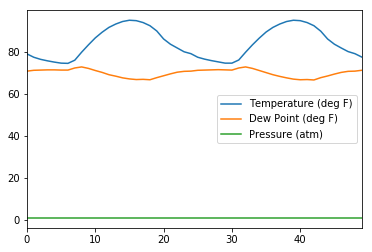

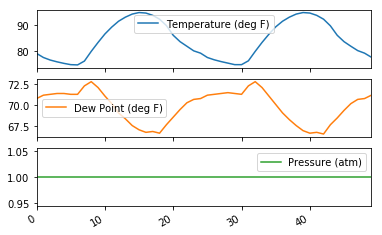

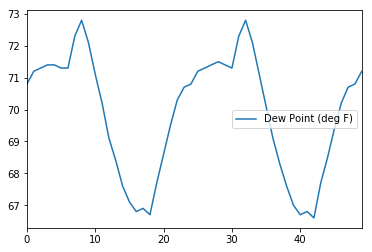

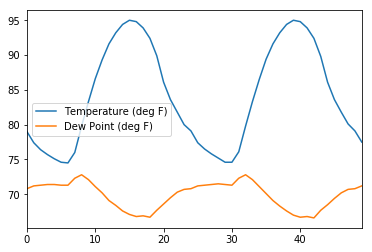

In [26]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ["Dew Point (deg F)"]
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()
